LOAD DATA

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


PREPRARING DATA

In [6]:
import numpy as np

# vectorize the data with function
def vectorize_sequences(sequences, dimension=10000):
    # buat matrix berisi 0 dengan dimensi (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i , sequence] = 1
    return results

In [7]:
# apply vectorized function
x_train = vectorize_sequences(train_data) # train data
x_test = vectorize_sequences(test_data) # test data

In [9]:
# one hot encoding the labels

def one_hot(labels, dimension=64):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [10]:
# apply one hot encoding function
one_hot_train_labels = one_hot(train_labels) # train labels
one_hot_test_labels = one_hot(test_labels) # test labels

In [12]:
# transform labels to categorical
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

BUILDING NETWORK

- ending the network with a dense layer size pf 46
- use softmax activation function

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compiling model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

SET VALIDATING DATA

- set 1000 samples in training data to use as validation set

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

TRAINING MODEL

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3703 - loss: 3.1573 - val_accuracy: 0.6170 - val_loss: 1.8088
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6606 - loss: 1.6285 - val_accuracy: 0.6870 - val_loss: 1.3569
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7387 - loss: 1.1953 - val_accuracy: 0.7300 - val_loss: 1.1873
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7827 - loss: 1.0029 - val_accuracy: 0.7690 - val_loss: 1.0755
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8257 - loss: 0.7960 - val_accuracy: 0.7840 - val_loss: 1.0003
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8579 - loss: 0.6701 - val_accuracy: 0.7930 - val_loss: 0.9486
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8796 - loss: 0.5598 - val_accuracy: 0.8100 - val_loss: 0.9191
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9008 - loss: 0.4778 - val_accuracy: 0.8230 - v

PLOTTING THE TRAINING AND VALIDATION LOSS

In [20]:
import matplotlib.pyplot as plt

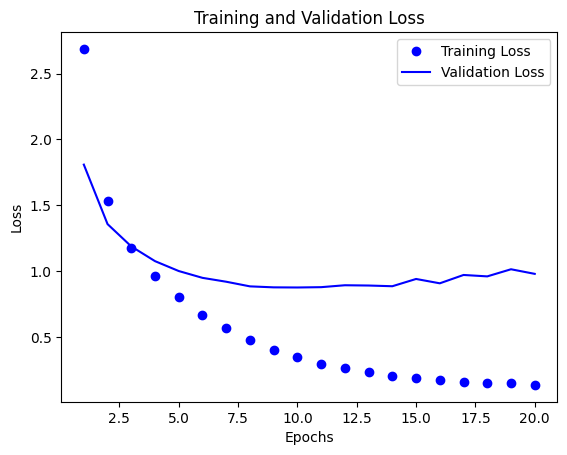

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

PLOTTING THE TRAINING AND VALIDATION ACCURACY

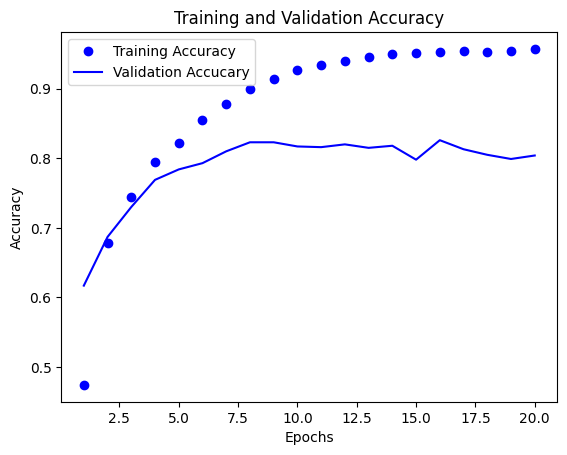

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accucary')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()           

GENERATING PREDICTIONS ON NEW DATA

In [24]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
# taking a look at the 1st sample prediction
predictions[0].shape

(46,)

In [29]:
# taking a look prediction of 1st sample, with argmax
np.argmax(predictions[0])

np.int64(3)